In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

In [2]:
# Total population, N.
total_pop = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = total_pop - I0 - R0
# A grid of time points (in days)
t = np.linspace(0, 160, num=160)

In [3]:
def dec_to_percentage_string(dec):
    rounded_str = str(round(dec * 100)) + '%'
    return rounded_str

In [4]:
def convert_mrr_to_days(mrr):
    x = Symbol('x')
    sol = solve(mrr * x - 1, x)
    sol_string = str(round(sol[0]))
    return sol_string

In [5]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [6]:
def plot_graph(total_pop, contact_rate, mean_recovery_rate):
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(total_pop, contact_rate, mean_recovery_rate))
    susceptible, infected, recovered = np.transpose(ret)

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    fig.suptitle('Contact Rate=' + dec_to_percentage_string(contact_rate) + ', Mean Recovery Time=' + convert_mrr_to_days(mean_recovery_rate) + ' Days')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, susceptible/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, infected/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, recovered/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()



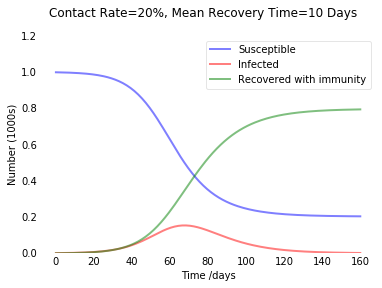

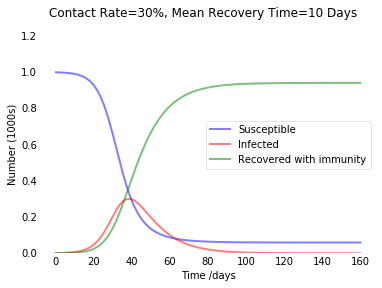

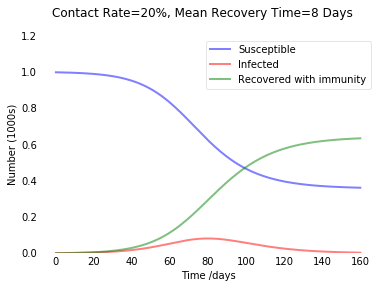

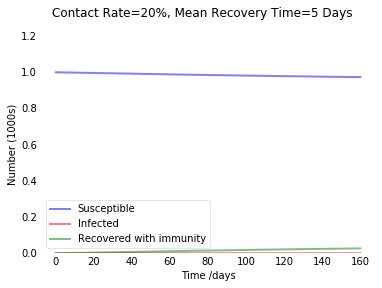

In [7]:
plot_graph(total_pop, contact_rate=0.2, mean_recovery_rate=1./10)
plot_graph(total_pop, contact_rate=0.3, mean_recovery_rate=1./10)
plot_graph(total_pop, contact_rate=0.2, mean_recovery_rate=1./8)
plot_graph(total_pop, contact_rate=0.2, mean_recovery_rate=1./5)